In [77]:

import pandas as pd
from ast import literal_eval
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import colors
plt.rcParams['figure.dpi'] = 300



def resi_list_to_sele(resi_list):
    return " or ".join(['resi ' + str(resi) for resi in resi_list])

In [78]:
voc = pd.read_csv('/n/groups/marks/projects/CEPI/data/order_summary/Designs_Jan18_2024.csv')
#included in structures so this is supposed to be commented out
#voc = voc[voc["# designed mutations"] >1]
voc = voc[["Round","All mutations"]].drop_duplicates()

In [80]:
#replace 683 with 689
#across all rounds
max_counts = 13
min_counts = 1

for design_round in voc.Round:
    print(design_round)
    base_muts = voc[voc.Round == design_round]["All mutations"].values[0].split(",")
    base_muts = [m.replace("del","D").strip()[1:-1] for m in base_muts]
    
    # process construct mutations
    constructs = pd.read_csv('/n/groups/marks/projects/CEPI/data/order_summary/Designs_Jan18_2024.csv')
    constructs = constructs[constructs.Round == design_round]
    
    muts = constructs['Designed mutations'].str.split(',').sum()
    muts = [m.strip()[1:-1] for m in muts]
    counter = Counter(muts)
    #print(counter)
    counts = list(set(counter.values()))
    count_to_sites = {v:[k for k in counter.keys() if counter[k]==v] 
                      for v in counts}
    #print(count_to_sites)
    
    color_array = plt.cm.Reds(np.linspace(0.1, 1, max_counts-min_counts+1))
    count_to_color = {c: color_array[c-1][:-1] for c in count_to_sites.keys()}
    pos = "+".join(set(muts))
    
    voc_pos = "+".join(set(base_muts) - set(muts))
    print(voc_pos)
    
    ofname= f"/n/groups/marks/projects/CEPI/figures/figures_submission_Jan2024/all_construct_mutations_{design_round}.pml"
   
    pdb = "7bnn"
    print("Pos", pos)
    print("voc pos", voc_pos)

    with open(ofname, 'w') as of_mean:
        of_mean.write(f"fetch {pdb}\n")
        of_mean.write("remove solvent\n")
        of_mean.write("remove not polymer.protein\n")
        of_mean.write("set specular, 0\n")
        of_mean.write("set depth_cue, 0\n")
        of_mean.write("set ambient, 0.5\n")
        of_mean.write("set ray_trace_gain, 0\n")
        of_mean.write("set ray_trace_mode, 1\n")
        of_mean.write("set ray_trace_color, black\n")
        of_mean.write("set ray_trace_depth_factor, 1\n")
        of_mean.write("set ray_trace_disco_factor, 1\n")
        of_mean.write("set light_count, 2\n")
        of_mean.write("set ray_opaque_background, 0\n")

        of_mean.write(f"show cartoon, chain B\n set cartoon_loop_radius, 0.4\n")
        chain_list = " or ".join([f'chain {chain}' for chain in ["A","C"]])
        of_mean.write(f"show as spheres, {chain_list}\n")
        of_mean.write(f"show surface, {chain_list}\n")
        of_mean.write(f"hidez cartoon, {chain_list}\n")
        of_mean.write("set transparency, 0.1\n")
        of_mean.write("color gray80, chain C\n")
        of_mean.write("color gray90, chain A\n")
        of_mean.write("color gray60, chain B\n")

        for count, sites in count_to_sites.items():
            of_mean.write(f"set_color count_{str(count)}, {list(count_to_color[count])}\n")
            of_mean.write(f"color count_{str(count)}, chain B and n. CA and ({resi_list_to_sele(sites)})\n")

        of_mean.write(f"select muts, chain B and resi {pos} and n. CA\n")
        of_mean.write(f"show spheres, muts\n")
        of_mean.write(f"set sphere_scale, 1.3\n")
        
        of_mean.write(f"select muts, chain B and resi {voc_pos} and n. CA\n")
        of_mean.write(f"show spheres, muts\n")
        of_mean.write(f"set sphere_scale, 0.7 ,muts\n")
        of_mean.write("color gray20, muts\n")
        
        of_mean.write("set_view (\
     0.863080263,   -0.038595602,    0.503587127,\
     0.503091335,   -0.022357624,   -0.863944292,\
     0.044603232,    0.999003589,    0.000120425,\
     0.000000000,    0.000000000, -582.171203613,\
   217.123504639,  216.823318481,  223.636428833,\
   465.121490479,  699.220947266,  -20.000000000 )\n")
        of_mean.write("bg 0\n")
        of_mean.write("ray 1000,1000\n")
        of_mean.write("cd Desktop/pymol\n")
        of_mean.write(f"save all_construct_mutations_{design_round}.pse\n")
        of_mean.write(f"save all_construct_mutations_{design_round}.png\n")

Round 1.1
614
Pos 486+439+403+248+155+158+490+69+76+529+683+494+478+484+113+147
voc pos 614
Round 1.1
614
Pos 486+439+403+248+155+158+490+69+76+529+683+494+478+484+113+147
voc pos 614
Round 1.1
614
Pos 486+439+403+248+155+158+490+69+76+529+683+494+478+484+113+147
voc pos 614
Round 1.1
614
Pos 486+439+403+248+155+158+490+69+76+529+683+494+478+484+113+147
voc pos 614
Round 1.1
614
Pos 486+439+403+248+155+158+490+69+76+529+683+494+478+484+113+147
voc pos 614
Round 1.1
614
Pos 486+439+403+248+155+158+490+69+76+529+683+494+478+484+113+147
voc pos 614
Round 1.1
614
Pos 486+439+403+248+155+158+490+69+76+529+683+494+478+484+113+147
voc pos 614
Round 1.1
614
Pos 486+439+403+248+155+158+490+69+76+529+683+494+478+484+113+147
voc pos 614
Round 1.1
614
Pos 486+439+403+248+155+158+490+69+76+529+683+494+478+484+113+147
voc pos 614
Round 1.1
614
Pos 486+439+403+248+155+158+490+69+76+529+683+494+478+484+113+147
voc pos 614
Round 1.1
614
Pos 486+439+403+248+155+158+490+69+76+529+683+494+478+484+113+147


Round 2.3
969+26+460+152+614+477+679+954+446+764+213+375+376+681+25+405+19+210+655+484+796+440+257+373+142+24+501+157+505+371+478+408
Pos 452+27+153+339+155+76+490+346+529+473+493+481+417+494+498+147
voc pos 969+26+460+152+614+477+679+954+446+764+213+375+376+681+25+405+19+210+655+484+796+440+257+373+142+24+501+157+505+371+478+408
Round 2.3
969+26+460+152+614+477+679+954+446+764+213+375+376+681+25+405+19+210+655+484+796+440+257+373+142+24+501+157+505+371+478+408
Pos 452+27+153+339+155+76+490+346+529+473+493+481+417+494+498+147
voc pos 969+26+460+152+614+477+679+954+446+764+213+375+376+681+25+405+19+210+655+484+796+440+257+373+142+24+501+157+505+371+478+408
Round 2.3
969+26+460+152+614+477+679+954+446+764+213+375+376+681+25+405+19+210+655+484+796+440+257+373+142+24+501+157+505+371+478+408
Pos 452+27+153+339+155+76+490+346+529+473+493+481+417+494+498+147
voc pos 969+26+460+152+614+477+679+954+446+764+213+375+376+681+25+405+19+210+655+484+796+440+257+373+142+24+501+157+505+371+478+408
Roun

Round 2.1
969+26+452+70+339+614+477+679+764+954+213+375+376+681+25+405+19+655+498+484+486+796+440+373+142+24+501+69+505+371+478+417+408
Pos 27+153+76+490+481+473+346+493+494
voc pos 969+26+452+70+339+614+477+679+764+954+213+375+376+681+25+405+19+655+498+484+486+796+440+373+142+24+501+69+505+371+478+417+408
Round 2.1
969+26+452+70+339+614+477+679+764+954+213+375+376+681+25+405+19+655+498+484+486+796+440+373+142+24+501+69+505+371+478+417+408
Pos 27+153+76+490+481+473+346+493+494
voc pos 969+26+452+70+339+614+477+679+764+954+213+375+376+681+25+405+19+655+498+484+486+796+440+373+142+24+501+69+505+371+478+417+408
Round 2.1
969+26+452+70+339+614+477+679+764+954+213+375+376+681+25+405+19+655+498+484+486+796+440+373+142+24+501+69+505+371+478+417+408
Pos 27+153+76+490+481+473+346+493+494
voc pos 969+26+452+70+339+614+477+679+764+954+213+375+376+681+25+405+19+655+498+484+486+796+440+373+142+24+501+69+505+371+478+417+408
Round 2.1
969+26+452+70+339+614+477+679+764+954+213+375+376+681+25+405+19+65

/tmp/ipykernel_26414/983582001.py:10: UserWarning: Use the colorbar set_ticks() method instead.
  plt.yticks([0,10,20,30],rotation=90, va='center')


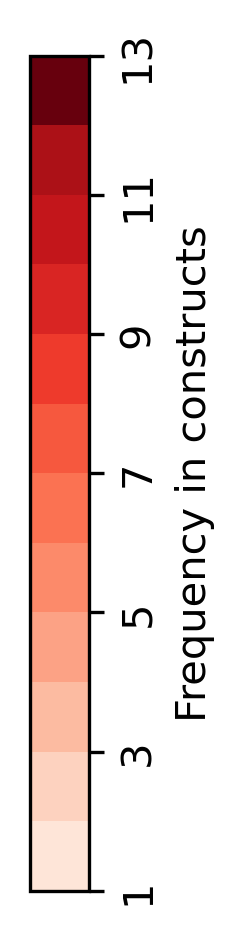

In [35]:
cmap = colors.ListedColormap(color_array)
bounds = list(range(min_counts, max_counts+1))
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(0.7,3), constrained_layout=True)
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
             cax=ax, orientation='vertical',
             label="Frequency in constructs")

plt.yticks([0,10,20,30],rotation=90, va='center')
fig.savefig('all_construct_mutations_rounds_cbar.png')